In [1]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel("../data/TCGA_MEASUREMENTS.xlsx")

In [3]:
df["years_to_event"] = df["days_to_event"]/365.25
df["decades_to_birth"] = df["years_to_birth"]/10

In [4]:
X = df.drop(columns=["years_to_event", "days_to_event"])

In [5]:
X

,ID,ADI,BACK,DEB,LYM,MUC,MUS,NORM,STR,TUM,...,pathology_M_stage,gender,histological_type,hypermutated,methylation_subtype,CAF_SCORE,percent_stromal_cells,RF_predictedCMS,cleanstage,decades_to_birth
0,TCGA-CM-6675,0.000284,0.000204,0.090979,0.000544,0.013228,0.007923,0.101498,0.086859,0.798861,...,m1b,male,colon adenocarcinoma,0.0,CIMP-H,2.080628,12,CMS1,4.0,3.5
1,TCGA-AY-A8YK,0.000324,0.000290,0.004827,0.013253,0.004651,0.002694,0.066702,0.140175,0.767085,...,m1,male,colon adenocarcinoma,NaN,NaN,1.635184,7,NaN,4.0,4.4
2,TCGA-CM-4747,0.001219,0.004085,0.197126,0.337597,0.002646,0.003099,0.158479,0.447476,0.485696,...,m1a,male,colon adenocarcinoma,0.0,CIMP-L,2.024608,15,NaN,4.0,4.7
3,TCGA-DY-A1DG,0.003772,0.001362,0.188463,0.002173,0.012698,0.063342,0.096374,0.012094,0.619722,...,m1,male,rectal adenocarcinoma,NaN,Cluster3,0.990050,0,NaN,4.0,7.5
4,TCGA-CM-5862,0.007687,0.006287,0.386051,0.086920,0.132158,0.130372,0.076991,0.102107,0.481279,...,m1a,male,colon adenocarcinoma,0.0,Cluster3,1.944954,0,CMS2,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,TCGA-CL-4957,0.008215,0.031160,0.078296,0.023389,0.009071,0.032259,0.202351,0.413524,0.201735,...,m0,female,rectal adenocarcinoma,0.0,Cluster4,2.032620,20,CMS2,NaN,7.9
496,TCGA-AD-6890,0.000167,0.000214,0.022478,0.002921,0.031190,0.001960,0.091274,0.326789,0.523009,...,mx,male,colon adenocarcinoma,0.0,CIMP-H,2.115697,10,CMS2,NaN,6.5
497,TCGA-AH-6644,0.000707,0.001519,0.301201,0.178563,0.042361,0.005472,0.070207,0.074859,0.325110,...,mx,male,rectal adenocarcinoma,0.0,Cluster4,3.260665,25,CMS4,NaN,7.3
498,TCGA-AD-6963,0.000042,0.000178,0.001873,0.056791,0.000457,0.000084,0.193539,0.001077,0.745959,...,mx,male,colon adenocarcinoma,NaN,Cluster4,1.657536,25,CMS2,NaN,5.8


In [6]:
classes_col = ["ADI","BACK", "DEB", "LYM", "MUC","MUS", "NORM", "STR","TUM"]

In [7]:
scaled_X = X[classes_col].copy()
col_names = scaled_X.columns
features = scaled_X[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_X[col_names] = features

In [8]:
df[["years_to_event","vital_status"]]

,years_to_event,vital_status
0,1.086927,0
1,1.568789,0
2,2.083504,0
3,4.287474,1
4,0.418891,1
...,...,...
495,0.000000,1
496,2.042437,0
497,2.294319,0
498,2.283368,0


In [9]:
y = df[["years_to_event","vital_status"]]
y_days = df[["days_to_event","vital_status"]]
scaled_X

,ADI,BACK,DEB,LYM,MUC,MUS,NORM,STR,TUM
0,-0.192161,-0.280475,-0.047387,-0.811732,-0.300486,-0.239747,-0.316563,-0.207776,0.747461
1,-0.191168,-0.276241,-0.730799,-0.746327,-0.377028,-0.293643,-0.539877,0.182238,0.617916
2,-0.169236,-0.089033,0.794650,0.922924,-0.394922,-0.289460,0.049134,2.430197,-0.529237
3,-0.106658,-0.223351,0.725926,-0.803352,-0.305214,0.331416,-0.349448,-0.754687,0.017155
4,-0.010718,0.019602,2.293340,-0.367195,0.760925,1.022235,-0.473846,-0.096231,-0.547245
...,...,...,...,...,...,...,...,...,...
495,0.002229,1.246650,-0.147991,-0.694162,-0.337578,0.011059,0.330693,2.181834,-1.686875
496,-0.195029,-0.280001,-0.590783,-0.799503,-0.140180,-0.301207,-0.382179,1.547351,-0.377119
497,-0.181778,-0.215589,1.620248,0.104446,-0.040482,-0.265008,-0.517379,-0.295552,-1.183906
498,-0.198088,-0.281767,-0.754233,-0.522257,-0.414462,-0.320537,0.274140,-0.835281,0.531794


In [10]:
cph = CoxPHFitter().fit(pd.concat([df["BACK"], y], axis=1), "years_to_event", "vital_status" )

In [11]:
cph_models = [ CoxPHFitter().fit(pd.concat([df[col], y], axis=1), "years_to_event", "vital_status" ) for col in classes_col]

In [ ]:
cph.print_summary()

In [13]:
allWeights = [float(cph.summary["exp(coef)"]) for cph in cph_models] 
allWeights = np.array(allWeights)

In [14]:
allCuts = np.array(
        [
            0.00056,
            0.00227,
            0.03151,
            0.00121,
            0.01123,
            0.02359,
            0.06405,
            0.00122,
            0.99961,
        ]
    )  # Youden cuts

In [15]:
print((allWeights))

[1.14988747 0.01458188 5.96672736 1.22524921 0.48793896 3.7607187
 0.90871294 1.15375135 0.47529061]


## Stroma score

In [16]:
data_np = df.to_numpy()

data_np = np.append(data_np, np.zeros((500, 1)), axis=1)  # add column for HD score
# print(data_np.shape)

#we are still missing parts which compute allCuts and medianTrainingSet!!!
medianTrainingSet = 8.347
scoreIndices = (np.argwhere(allWeights >= 1)).flatten()
print(scoreIndices)

for i in scoreIndices:
    data_np[:, -1] = (
        data_np[:, -1] + (data_np[:, i + 1] >= allCuts[i]) * allWeights[i]
        )  # +1 retrieve column number in x

data_np[:, -1] = (data_np[:, -1] >= medianTrainingSet) * 1

data_np[:, -1]

[0 2 3 5 7]


array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,

In [17]:
# def calculate_stroma_score(path_to_TGCA):
#     x = pd.read_excel(path_to_TGCA).to_numpy()
#     # print(x.shape)
#     x[:, -1] = x[:, -1] / 365.35  # convert 'days to event' to 'years to event'
#     x[:, 11] = x[:, 11] / 10  # convert 'years to birth' to 'decades to birth'
#     x = np.append(x, np.zeros((500, 1)), axis=1)  # add column for HD score

#     allCuts = np.array(
#         [
#             0.00056,
#             0.00227,
#             0.03151,
#             0.00121,
#             0.01123,
#             0.02359,
#             0.06405,
#             0.00122,
#             0.99961,
#         ]
#     )  # Youden cuts
#     allWeights = np.array(
#         [1.150, 0.015, 5.967, 1.226, 0.488, 3.761, 0.909, 1.154, 0.475]
#     )  # HR
#     print(allWeights)
#     medianTrainingSet = 8.347
#     scoreIndices = (np.argwhere(allWeights >= 1)).flatten()
#     print(scoreIndices)
#     for i in scoreIndices:
#         x[:, -1] = (
#             x[:, -1] + (x[:, i + 1] >= allCuts[i]) * allWeights[i]
#         )  # +1 retrieve column number in x
#     x[:, -1] = (x[:, -1] >= medianTrainingSet) * 1

#     return x[:, -1]

In [18]:
# calculate_stroma_score("../data/TCGA_MEASUREMENTS.xlsx")

## Finding allCuts

In [35]:
cph_models[0].predict_log_partial_hazard(df)

0     -0.001095
1     -0.001089
2     -0.000964
3     -0.000608
4     -0.000061
         ...   
495    0.000013
496   -0.001111
497   -0.001036
498   -0.001129
499    0.000543
Length: 500, dtype: float64

In [117]:
y_survival = df["vital_status"]
y_scores = [cph_models[i].predict_log_partial_hazard(df) for i in range(len(cph_models))]

In [118]:
def specificity(y_true, y_pred):
    TN = np.sum(np.logical_and(y_pred == 0, y_true == 0))

    N = len(y_true) -np.sum(y_true)
    
    return TN/N

In [119]:
from sklearn.metrics import roc_curve, recall_score
i = 1
fpr, tpr, thresholds = roc_curve(y_survival, y_scores[i])

In [120]:
test = np.array(y_scores[0])
preds =  np.greater(test, 0.00056).astype(int)

In [125]:
y_scores[0][0]

-0.0010950048296287684

In [121]:
np.sum(preds ==y_survival)

367

In [130]:
thresholds = []

for i, class_score in enumerate(y_scores):
    max_index = 0
    median = np.median(class_score)
    for j, score in enumerate(class_score):
        if j==0:
            thresholds.append(score)

        preds =  np.greater(class_score, score).astype(int)
        sens = recall_score(y_survival, preds)
        spec = specificity(y_survival, preds)
#         print(sens+spec)
        if (sens+spec) > max_index:
            max_index = sens+spec
            thresholds[i] = score
        elif sens+spec == max_index:
            print("here")
            if abs(score - median) < abs(thresholds[i] - median):
                thresholds[i] = score
                max_index = score  
    
    
    
thresholds

1.107221530504741
1.1257063499664783
1.1257063499664783
1.1257063499664783
1.1257063499664783
1.1564505315582798
1.1564505315582798
1.1564505315582798
1.1564505315582798
1.1564505315582798
1.1564505315582798
1.1564505315582798
1.1564505315582798
1.1564505315582798
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.162580212623312
1.1727324968872712
1.1727324968872712
1.1727324968872712
1.1727324968872712
1.1727324968872712
1.1727324968872712
1.1727324

[-0.0010566654675311705]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


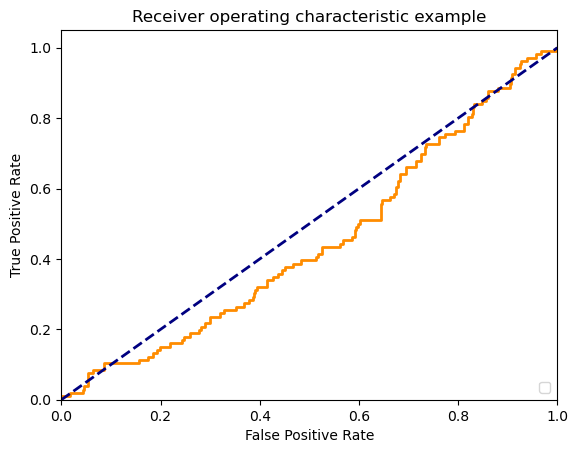

In [124]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()


## MV model 

In [19]:
df["obtained_scores"] = data_np[:, -1]

In [20]:
df["gender"]

0        male
1        male
2        male
3        male
4        male
        ...  
495    female
496      male
497      male
498      male
499      male
Name: gender, Length: 500, dtype: object

In [23]:
selected_columns = ["obtained_scores" ,"cleanstage", "gender", "decades_to_birth" ]
df_mv = df.dropna(subset=["cleanstage", "decades_to_birth"])
# print(df_mv)
y_mv = df_mv[["years_to_event","vital_status"]]

# print(mv_regression_df)
mv_cox = CoxPHFitter().fit(pd.concat([df_mv[selected_columns], y_mv], axis=1), "years_to_event", "vital_status", 
                           formula = "obtained_scores + cleanstage + C(gender) +decades_to_birth" )

In [22]:

mv_cox.print_summary()

/home/bartek/miniconda3/envs/dslab/lib/python3.9/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 483 total observations, 384 right-censored observations>
             duration col = 'years_to_event'
                event col = 'vital_status'
      baseline estimation = breslow
   number of observations = 483
number of events observed = 99
   partial log-likelihood = -488.37
         time fit was run = 2022-11-20 16:09:39 UTC

---
                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                    
C(gender)[T.male]     -0.31       0.73       0.21            -0.71             0.09                 0.49                 1.10
cleanstage             0.84       2.32       0.12             0.61             1.07                 1.84                 2.92
decades_to_birth       0.41       1.50       0.09             0.23             0.58                 1.25                 1.79
obtained_scores[T.1]   0.78       2.19       0.21             0.36             1.20                 1.44                 3.34

                       cmp to     z      p   -log2(p)
covariate                                            
C(gender)[T.male]        0.00 -1.51   0.13       2.92
cleanstage               0.00  7.11 <0.005      39.68
decades_to_birth         0.00  4.43 <0.005      16.70
obtained_scores[T.1]     0.00  3.64 <0.005      11.87
---
Concordance = 0.75
Partial AIC = 984.73
log-likelihood ratio test = 88.88 on 4 df
-log2(p) of ll-ratio test = 58.61